In [1]:
import pbjam as pb
from pbjam.jar import session
import matplotlib.pyplot as plt
import numpy as np
import lightkurve as lk 
import sys

In [2]:
kic = '4448777'
numax = [220.0, 3.0]
dnu = [16.97, 0.01]
teff = [4750, 100]
bp_rp = [1.34, 0.01]

In [5]:
# Initialize a jam session with a single star:
jam_sess = session(ID = [kic], numax = [numax], dnu = [dnu], teff = [teff], bp_rp = [bp_rp], 
                   nthreads=1, use_cached=False)

In [6]:
# Result is always a list of star class instances
# Taking the first one as an example
star = jam_sess.stars[0]

In [7]:
star.asymptotic_modeid(norders = 7)

Burningham
Sampling


In [12]:
print(star.asy_result.modeID)

    ell       nu_mu    nu_std
0     2  157.471264  0.040826
1     0  159.678670  0.038347
2     2  174.073789  0.024341
3     0  176.281140  0.021374
4     2  190.800183  0.016152
5     0  193.007567  0.012958
6     2  207.651017  0.013743
7     0  209.858505  0.010979
8     2  224.626646  0.012581
9     0  226.834160  0.009829
10    2  241.726834  0.014697
11    0  243.934451  0.011959
12    2  258.951178  0.025961
13    0  261.158660  0.023909


In [15]:
print(star.asy_result.summary)

           numax        dnu       eps     alpha       d02  env_height  \
best  223.561318  17.014506  1.331674  0.007195  2.206268    4.310540   
mean  222.781273  17.008057  1.336631  0.007313  2.207341    4.302128   
std     1.480711   0.009748  0.007497  0.000391  0.015195    0.009635   
skew   -0.680643  -1.281190  1.252515 -0.022850 -0.076745   -2.051217   
2nd   215.984830  16.955896  1.326436  0.005924  2.153828    4.231293   
16th  217.057892  16.964743  1.326665  0.006149  2.162615    4.246168   
50th  217.966933  16.971493  1.326943  0.006291  2.167770    4.260361   
84th  218.462635  16.976205  1.327158  0.006356  2.170700    4.265052   
97th  218.544674  16.977234  1.327204  0.006371  2.171348    4.266718   

      env_width  mode_width         teff     bp_rp  
best  57.078926   -0.309249  4879.085317  1.338770  
mean  57.591990   -0.313111  4884.451096  1.338150  
std    0.566439    0.012233    71.028056  0.009338  
skew   1.860312   -0.094493    -0.038603 -0.020164  
2nd 

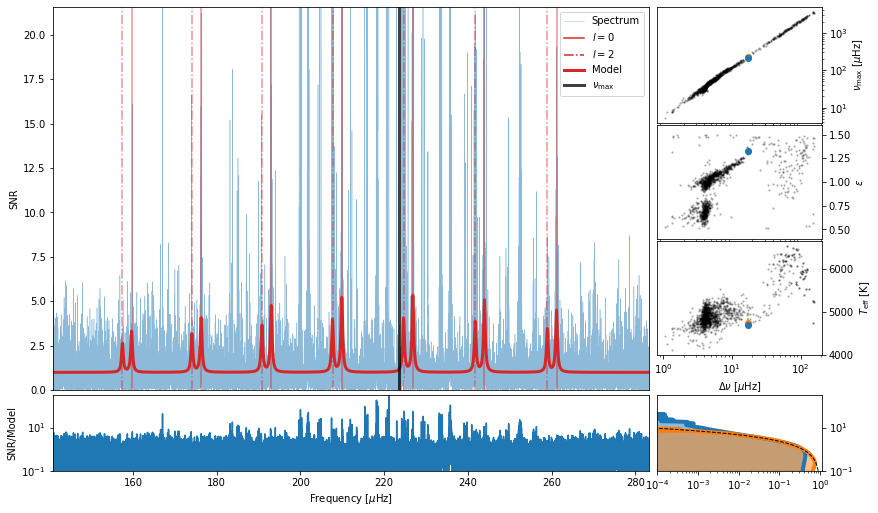

In [16]:
fig = star.plot_asyfit()

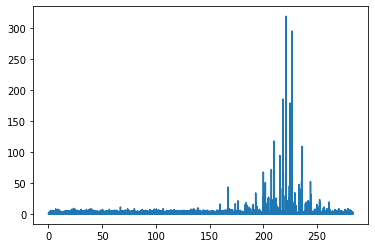

In [14]:
fig, ax = plt.subplots()
ax.plot(star.f, star.s)

In [38]:
dnu = star.asy_result.summary.loc['best'].dnu
epsilon = star.asy_result.summary.loc['best'].eps
bin_width = star.f[1] - star.f[0]
w = int(dnu / bin_width)
s = int(epsilon * dnu / bin_width * 0.8)
h = int(np.floor(len(star.s[s:]) / w))
ladder_p = np.reshape(star.s[s:h*w+s], [h, w])[:, :int(w/2)]
ladder_f = np.reshape(star.f[s:h*w+s], [h, w])[:, :int(w/2)]

In [39]:
print(ladder_p.shape)

(15, 1080)


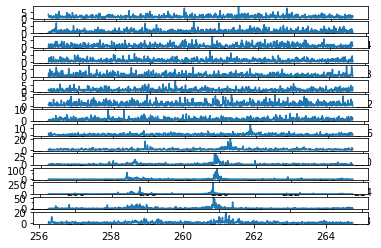

In [40]:
n = ladder_p.shape[0]
fig, ax = plt.subplots(n)
for i in range(n):
    ax[i].plot(ladder_f[i, :], ladder_p[i, :])

In [50]:
from pbjam import peakbag 
import importlib

In [183]:
importlib.reload(peakbag)
pb = peakbag.peakbag(star.f, star.s, star.asy_result)

{'l0': array([159.67866998, 176.28114035, 193.00756692, 209.85850543,
       226.83415954, 243.93445093, 261.15865971]), 'l2': array([157.4712638 , 174.07378871, 190.80018349, 207.65101749,
       224.62664619, 241.72683374, 258.95117819]), 'width0': array([0.49062618, 0.49062618, 0.49062618, 0.49062618, 0.49062618,
       0.49062618, 0.49062618]), 'width2': array([0.49062618, 0.49062618, 0.49062618, 0.49062618, 0.49062618,
       0.49062618, 0.49062618]), 'height0': array([2.30426234, 3.05872473, 3.73517921, 4.18809911, 4.30346003,
       4.0445246 , 3.46990317]), 'height2': array([1.61298364, 2.14110731, 2.61462544, 2.93166937, 3.01242202,
       2.83116722, 2.42893222]), 'back': array([1., 1., 1., 1., 1., 1., 1.])}
[8, 9, 10, 11, 12, 13, 14]


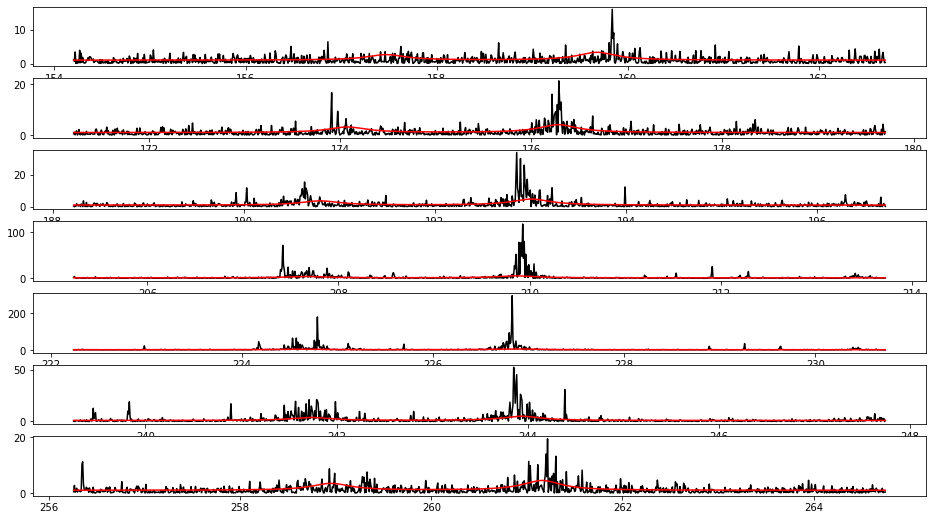

In [184]:
pb.plot_start_model()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [back, height2, height0, width2, width0, l2, l0]
Sampling 4 chains: 100%|██████████| 4000/4000 [02:01<00:00,  9.99draws/s] 
There were 14 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6791291640816288, but should be close to 0.8. Try to increase the number of tuning steps.
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5799474502716172, but should be close to 0.8. Try to increase the number of tuning steps.
The estimated number of effective samples is smaller than 200 for some parameters.


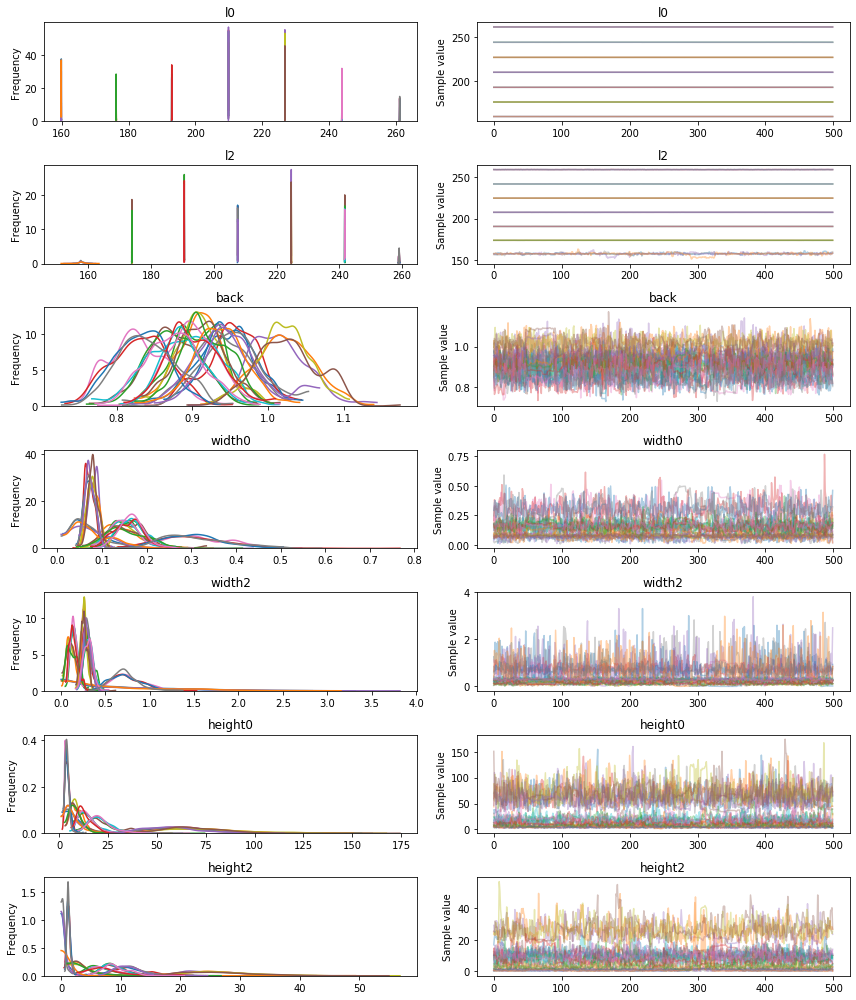

In [185]:
pb.sample()

In [186]:
pm.summary(pb.samples)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
l0__0,159.838598,0.012380,0.000483,159.815303,159.864497,372.268188,1.003811
l0__1,176.268501,0.016924,0.000627,176.237220,176.301809,323.977469,1.004316
l0__2,192.919630,0.014223,0.000382,192.892281,192.947727,1624.508721,1.000013
l0__3,209.924646,0.007490,0.000288,209.911091,209.940138,293.433848,1.011524
l0__4,226.817075,0.007739,0.000233,226.801638,226.830818,802.609534,1.002637
l0__5,243.883503,0.014170,0.000434,243.857506,243.910140,739.485523,1.001121
l0__6,261.204495,0.029290,0.000886,261.142108,261.256803,819.641546,1.000104
l2__0,157.747536,1.111457,0.069962,155.758134,159.998395,146.888597,1.006576
l2__1,173.944377,0.025191,0.001156,173.904368,174.002082,205.709459,1.004326
l2__2,190.622962,0.017764,0.000561,190.587851,190.657486,763.156426,1.006385


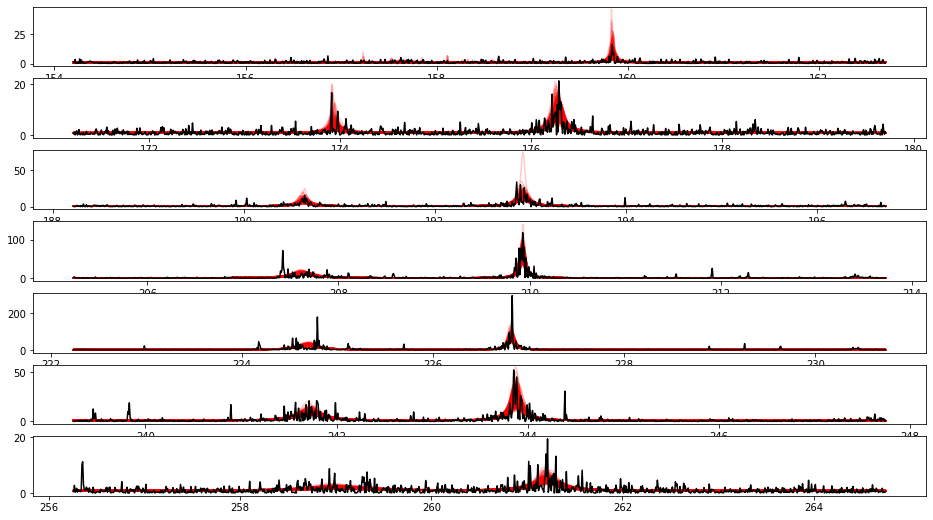

In [191]:
pb.plot_fit(thin=2)

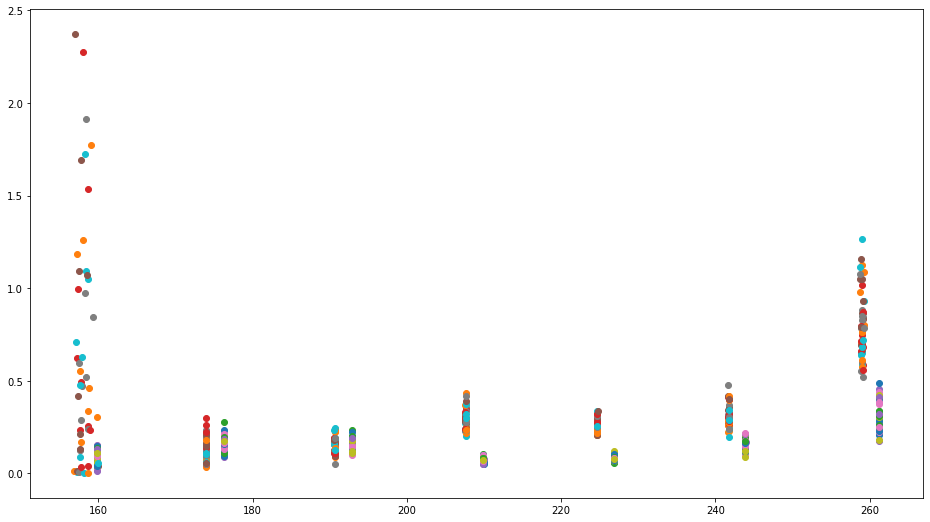

In [192]:
pb.plot_linewidth(thin=10)

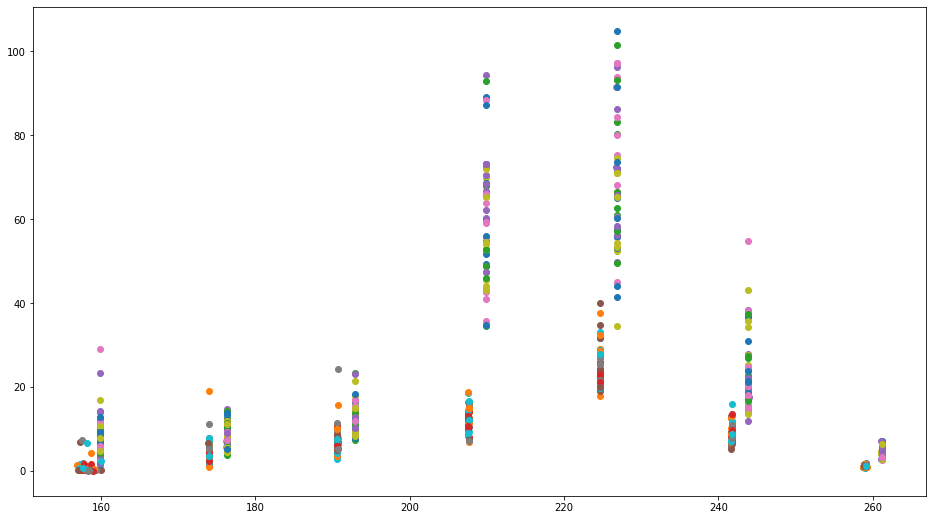

In [193]:
pb.plot_height(thin=10)